## Part    1    ‑    Exploratory    data    analysis  

The    attached       logins.json       file     contains     (simulated)     timestamps    of    user     logins     in    a    particular  geographic     location.     Aggregate     these     login     counts    based    on    15­ minute     time     intervals,    and  visualize     and    describe     the     resulting     time     series    of     login     counts     in    ways     that    best     characterize     the  underlying    patterns     of     the    demand.     Please     report/illustrate     important     features    of     the    demand,  such     as    daily     cycles.     If     there     are     data     quality     issues,    please     report     them

In [1]:
# load pacckages
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read json file
logins = pd.read_json('logins.json')

In [3]:
# add a column
logins['count'] = 1

In [4]:
# count logins per 15 minute intervals
logins_index = logins.set_index('login_time')
logins_index.sort_index(inplace=True)
logins_index = logins_index.resample('15T').sum()

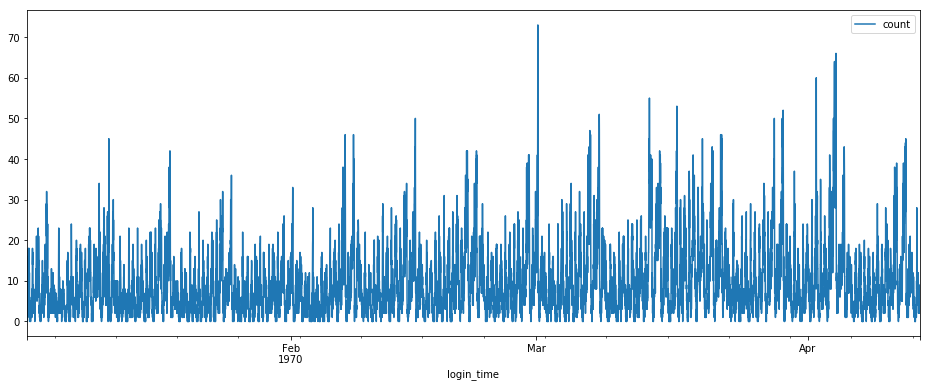

In [5]:
# plot data
logins_index.plot(figsize=[16,6])
plt.show()

It does look like there login data goes in circles. Let's see what this cycle look for each hour in a day and for each day of the week.

In [6]:
# add columns with hour and day of week
logins_index['hour'] = logins_index.index.map(lambda x: x.hour)
logins_index['day_of_week'] = logins_index.index.map(lambda x: x.day_name())

In [7]:
logins_index.head()

,count,hour,day_of_week
login_time,,,
1970-01-01 20:00:00,2,20,Thursday
1970-01-01 20:15:00,6,20,Thursday
1970-01-01 20:30:00,9,20,Thursday
1970-01-01 20:45:00,7,20,Thursday
1970-01-01 21:00:00,1,21,Thursday


In [8]:
# aggregate by hour
logins_hour = logins_index.groupby('hour')['count'].mean()

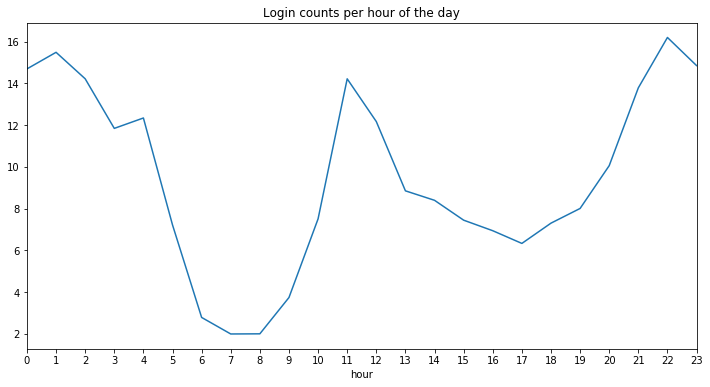

In [9]:
# plot findings
logins_hour.plot(figsize = [12,6])
plt.title('Login counts per hour of the day')
plt.xticks(np.arange(24))
plt.show()

From the above graph it can be concluded that most logins are done in the late evening and late night from 10pm to 2 am. Also there is an increase at around noon. The least busy time is from 6am to 8am. 

The activity like this shows that most logins can be either done by people at work (explains peaks during the midday) and by late night gamers or internet browsers (depending on what service logins are being explored).

In [10]:
# aggregate by day of the week
logins_day = logins_index.groupby('day_of_week')['count'].mean()

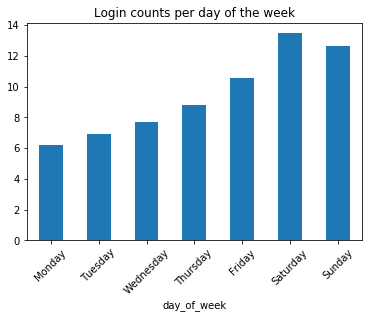

In [11]:
# plot findings
order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
logins_day.loc[order].plot(x = logins_day.index, y = logins_day, kind = 'bar')
plt.title('Login counts per day of the week')
plt.xticks(rotation=45)
plt.show()

The logins increase the the week progresses with most of them happening on Saturday.

## Part    2    ‑    Experiment    and    metrics    design 

The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.    However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs.  

1. What    would     you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     partners     to     serve    both     cities,    and    why    would     you     choose     this    metric?  

By reimbursing toll fees the city is trying to create more available cars in both cities at the demand time. I think that the wait time (the time the rider is waiting for his or her driver) can be a key success measure. Significant decrease in time will allow to consider the new policy successful.

2. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success.    Please    provide    details     on:   

    a. how     you    will     implement     the    experiment  
    
    The experiment can be done in two consecutive weeks that are similar in content (5 regular working weeks and two weekend days, no holidays or special occasions - like large shows ot or city celebrations). One week the system will operate under regular conditions (tolls are not reimbursed) and the other week the new policy will be in place. 
    
    b. what     statistical     test(s)     you    will     conduct     to     verify     the     significance    of     the  observation  
    
    I will do a hypothesis testing in which 
    
    H0 will assume the average waiting time after implementing new toll policies (AVG_WAIT_TIME_NEW) will be the same or smaller than average waiting time after implementing the policy (AVG_WAIT_TIME_OLD).
    
    Alternative H1 hypothesis will mean that AVG_WAIT_TIME_NEW > AVG_WAIT_TIME_OLD
    
    One-sided t-test can be a good way to conduct hypothesis testing.
    
    c. how     you    would     interpret     the     results    and    provide     recommendations     to     the     city  operations     team    along    with    any     caveats. 
    
    If the null hypothesis cannot be rejected, that will mean that the new policy did not provide any service improvements and should not be implemented. If H0 can be rejected, then it makes sense to introduce toll reimbursement policy.


## Part    3    ‑    Predictive     modeling  

Ultimate     is     interested     in     predicting     rider     retention.    To    help    explore     this    question,    we    have  provided     a     sample    dataset     of     a     cohort    of    users    who     signed    up     for    an    Ultimate    account     in 
January    2014.    The     data    was    pulled     several    months     later;    we     consider    a    user     retained     if     they  were     “active”     (i.e.     took    a     trip)     in     the     preceding    30    days. 

We     would     like     you     to    use     this    data     set     to    help    understand    what     factors    are     the    best    predictors  for     retention,    and    offer     suggestions     to     operationalize     those     insights     to    help    Ultimate.    


The    data     is     in     the    attached     file     ultimate_data_challenge.json.    See    below     for    a    detailed  description     of     the    dataset.     Please     include    any     code     you    wrote     for     the    analysis    and    delete     the  dataset    when     you    have     finished     with     the     challenge.    

1. Perform    any     cleaning,     exploratory    analysis,    and/or     visualizations     to    use     the    provided  data     for     this    analysis     (a     few     sentences/plots    describing     your    approach    will     suffice).    What  fraction     of     the    observed     users    were     retained?  

2. Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.  

3. Briefly    discuss    how     Ultimate     might     leverage     the     insights    gained     from     the    model     to  improve     its     long­  term     rider     retention     (again,    a     few     sentences    will     suffice).  

In [12]:
import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# create simple logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [13]:
with open('ultimate_data_challenge.json') as f:
    ultimate = json.load(f)
    
ultimate = pd.DataFrame(ultimate)
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [14]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Some of the columns have missing values. Let's fill them in with mean and median correspondingly.

In [15]:
rating_by_driver = ultimate.avg_rating_by_driver.mean()
rating_of_driver = ultimate.avg_rating_of_driver.mean()
phone = ultimate.phone.value_counts().index[0]

missing = {'avg_rating_by_driver': rating_by_driver, 'avg_rating_of_driver': rating_of_driver, 'phone': phone}

ultimate.fillna(missing, inplace=True)

Lets create a target variable retained (1 if the user was retained - made a trip for the last 30 days and 0 otherwise).

In [16]:
# first find out the most recent date of the trip to start counting 30 days back from it.

last_trip = ultimate.last_trip_date.max()

print('The last trip date to count back from is '+ last_trip)

The last trip date to count back from is 2014-07-01


In [17]:
# calculate the date to which to compare
comparison_date = datetime.datetime.strptime(last_trip, '%Y-%m-%d') - datetime.timedelta(days=30)
comparison_date = datetime.datetime.strftime(comparison_date, '%Y-%m-%d')
print('The date to compare last trip dates to is '+ comparison_date)

The date to compare last trip dates to is 2014-06-01


In [18]:
ultimate['retained'] = [1 if x > comparison_date else 0 for x in ultimate.last_trip_date]

In [19]:
ultimate['retained_str'] = ultimate.retained.map({1:'yes', 0: 'no'})

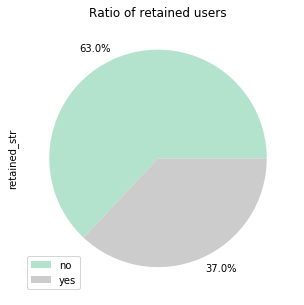

In [20]:
# count % of listings in each category
x = (ultimate.retained_str.value_counts(normalize = True)*100).round(0)

# display the outcome in pie chart
x.plot(kind = 'pie', colormap = 'Pastel2', labels = (x.astype(str) + '%'), figsize = [5,5])
plt.title('Ratio of retained users')
plt.legend(x.index, loc = 'lower left', frameon = True)
plt.show()

There are 37% of users that were retained. This means every third user is retained. Let's see now what factors influence this.

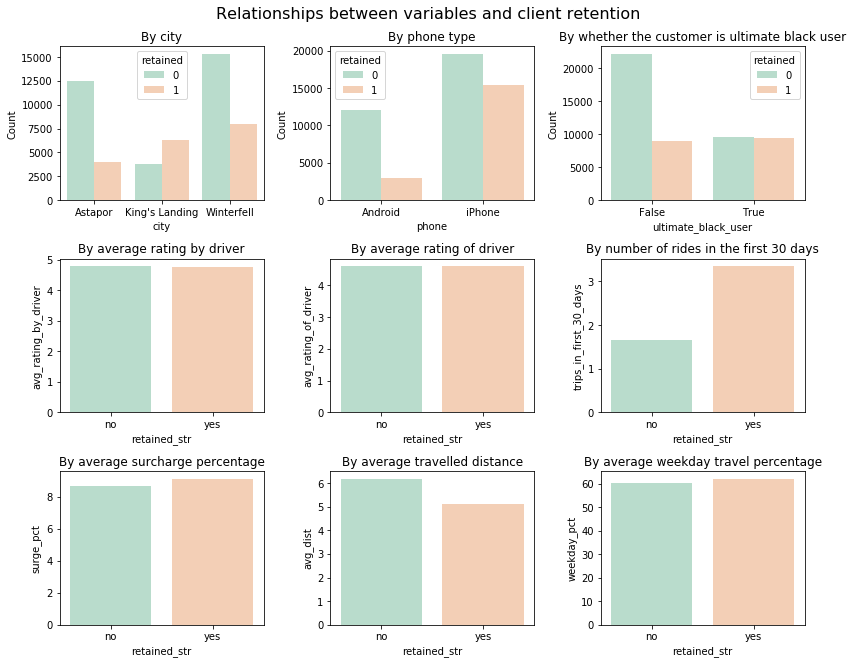

In [21]:
# plot how whether the client is retained or not depends on other variables
plt.figure(figsize=[12,9])

plt.subplot(3,3,1)
a = ultimate.groupby(['city','retained']).count().reset_index()
sns.barplot(x = 'city', data=a, y='avg_dist', hue='retained', ci=0, palette='Pastel2')
plt.title('By city')
plt.ylabel('Count')

plt.subplot(3,3,2)
a = ultimate.groupby(['phone','retained']).count().reset_index()
sns.barplot(x = 'phone', data=a, y='avg_dist', hue='retained', ci=0, palette='Pastel2')
plt.title('By phone type')
plt.ylabel('Count')

plt.subplot(3,3,3)
a = ultimate.groupby(['ultimate_black_user','retained']).count().reset_index()
sns.barplot(x = 'ultimate_black_user', data=a, y='avg_dist', hue='retained', ci=0, palette='Pastel2')
plt.title('By whether the customer is ultimate black user')
plt.ylabel('Count')

plt.subplot(3,3,4)
sns.barplot(y='avg_rating_by_driver', x='retained_str', data=ultimate, palette='Pastel2', ci=0, order=['no', 'yes'])
plt.title('By average rating by driver')

plt.subplot(3,3,5)
sns.barplot(y='avg_rating_of_driver', x='retained_str', data=ultimate, palette='Pastel2', ci=0, order=['no', 'yes'])
plt.title('By average rating of driver')

plt.subplot(3,3,6)
sns.barplot(y='trips_in_first_30_days', x='retained_str', data=ultimate, palette='Pastel2', ci=0, order=['no', 'yes'])
plt.title('By number of rides in the first 30 days')

plt.subplot(3,3,7)
sns.barplot(y='surge_pct', x='retained_str', data=ultimate, palette='Pastel2', ci=0, order=['no', 'yes'])
plt.title('By average surcharge percentage')

plt.subplot(3,3,8)
sns.barplot(y='avg_dist', x='retained_str', data=ultimate, palette='Pastel2', ci=0, order=['no', 'yes'])
plt.title('By average travelled distance')

plt.subplot(3,3,9)
sns.barplot(y='weekday_pct', x='retained_str', data=ultimate, palette='Pastel2', ci=0, order=['no', 'yes'])
plt.title('By average weekday travel percentage')

plt.suptitle('Relationships between variables and client retention', y=1.02, size=16)
plt.tight_layout()
plt.show()

Above plots show that whether the customer is retained or not can depend on several factors:
 
 - the city the customer is from (King's Landing having higher retention rate in comparison to the lost rate, but Winterfell has more retained customers overall)
 - phone type the customer is using (iPhone users seem to stay with the service more than Android users)
 - the  clients that used Ultimate Black service have the same probability to retain or drop, however, the ones that did never try it tend to drop more often
 - retained clients tend to use the service more frequently in the first 30 days after signing. About 3 times on average
 - average distance travelled by retained customers is smaller than by those who dropped.
 
Average percentage of surchage and percentage of weekday travels are slightly higher for retained clients.

All passengers tend to give and receive pretty high ratings.


Now lets prepare data for building model.

In [22]:
# select numerical columns
numerical = ['avg_dist', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

In [23]:
# standardize numeric variables
X = pd.DataFrame(StandardScaler().fit_transform(ultimate[numerical]))
X.columns = numerical

In [24]:
# hot encode categorical variables.
x1 = pd.get_dummies(ultimate.city).drop('King\'s Landing', axis=1)
x2 = ultimate.phone.map({'iPhone': 0, 'Android':1})
x1 = x1.join(x2)
x3 = ultimate.ultimate_black_user.map({True:1, False: 0})
x1 = x1.join(x3)

In [25]:
# combine categorical and numerical variables
X = X.join(x1)

In [26]:
# build target variable
y = ultimate.retained

In [27]:
# split data into training and testing
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

This is a classification problem and I will start with building and optimizing hyperparameter for Logistic regression.

In [28]:
# find optimal parameter C
parameters = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2]}
lgr = LogisticRegression(solver = 'lbfgs')
lgr_search = GridSearchCV(lgr, parameters, cv=5, scoring='accuracy', return_train_score=True)
lgr_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [29]:
print('The best parameter: C = {}'.format(lgr_search.best_params_['C']))

The best parameter: C = 1.5


In [30]:
# train logistic Regression with the optimum parameter value
c_best = lgr_search.best_params_['C']
lgr_best = LogisticRegression(solver='lbfgs', C=c_best)
lgr_best.fit(X_train, y_train)
y_lgr_best_test = lgr_best.predict(X_test)
y_lgr_best_train = lgr_best.predict(X_train)

In [31]:
# check accuracy score
print('Accuracy score on test data: {}'.format(metrics.accuracy_score(y_test,y_lgr_best_test)))
print('Accuracy score on train data: {}'.format(metrics.accuracy_score(y_train,y_lgr_best_train)))

Accuracy score on test data: 0.7202666666666667
Accuracy score on train data: 0.7240857142857143


The scores for testing and training data are about the same, which means that the model is not overfitting. However, accuracy score of 72% is rather low. Let's see how support vector machines performs.

In [32]:
# hyperparameter tuning for support vector machines model.
svm = SVC()
parameters = {'C': [0.01, 0.1, 1.0, 1.5, 10],
              'gamma':[0.0, 0.1, 1, 10,100]}
svm_search = GridSearchCV(svm, parameters, cv=5, scoring='accuracy', verbose=2)
svm_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.01, gamma=0.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................ C=0.01, gamma=0.0, total=  23.3s
[CV] C=0.01, gamma=0.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.2s remaining:    0.0s


[CV] ................................ C=0.01, gamma=0.0, total=  24.0s
[CV] C=0.01, gamma=0.0 ...............................................
[CV] ................................ C=0.01, gamma=0.0, total=  24.8s
[CV] C=0.01, gamma=0.0 ...............................................
[CV] ................................ C=0.01, gamma=0.0, total=  24.6s
[CV] C=0.01, gamma=0.0 ...............................................
[CV] ................................ C=0.01, gamma=0.0, total=  24.6s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=  41.6s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=  41.6s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=  41.5s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .

[CV] ................................. C=1.0, gamma=0.1, total=  14.7s
[CV] C=1.0, gamma=1 ..................................................
[CV] ................................... C=1.0, gamma=1, total=  22.4s
[CV] C=1.0, gamma=1 ..................................................
[CV] ................................... C=1.0, gamma=1, total=  22.5s
[CV] C=1.0, gamma=1 ..................................................
[CV] ................................... C=1.0, gamma=1, total=  22.3s
[CV] C=1.0, gamma=1 ..................................................
[CV] ................................... C=1.0, gamma=1, total=  22.2s
[CV] C=1.0, gamma=1 ..................................................
[CV] ................................... C=1.0, gamma=1, total=  22.0s
[CV] C=1.0, gamma=10 .................................................
[CV] .................................. C=1.0, gamma=10, total=  47.0s
[CV] C=1.0, gamma=10 .................................................
[CV] .

[CV] ................................... C=10, gamma=10, total= 2.0min
[CV] C=10, gamma=10 ..................................................
[CV] ................................... C=10, gamma=10, total= 1.7min
[CV] C=10, gamma=10 ..................................................
[CV] ................................... C=10, gamma=10, total= 1.8min
[CV] C=10, gamma=100 .................................................
[CV] .................................. C=10, gamma=100, total= 2.3min
[CV] C=10, gamma=100 .................................................
[CV] .................................. C=10, gamma=100, total= 2.3min
[CV] C=10, gamma=100 .................................................
[CV] .................................. C=10, gamma=100, total= 2.4min
[CV] C=10, gamma=100 .................................................
[CV] .................................. C=10, gamma=100, total= 2.7min
[CV] C=10, gamma=100 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 108.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1.0, 1.5, 10],
                         'gamma': [0.0, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [33]:
# check best parameter values
svm_params = svm_search.best_params_ 
svm_params

{'C': 1.0, 'gamma': 1}

In [34]:
svm_best = SVC(C=svm_params['C'], gamma=svm_params['gamma'])
svm_best.fit(X_train, y_train)
y_svm_test = svm_best.predict(X_test)
y_svm_train = svm_best.predict(X_train)

In [35]:
# check accuracy score
print('Accuracy score on test data: {}'.format(metrics.accuracy_score(y_test,y_svm_test)))
print('Accuracy score on train data: {}'.format(metrics.accuracy_score(y_train,y_svm_train)))

Accuracy score on test data: 0.7672666666666667
Accuracy score on train data: 0.7875714285714286


The accuracy has improved, but maybe since the data is sligtly imbalanced (37% of retained vs. 63% of lost customers) it makes sense to use ensemble method to address it. Let's see how Random Forest will perform. Since there are  a lot more hyperparameters to tune for Random forest model, I am using Randomized Search cross-validation that only tests random combinations.

In [36]:
# hyperparameters for Random Forest classifier
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 11)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }

In [37]:
# find optimal parameters
rf = RandomForestClassifier()
rf_search = RandomizedSearchCV(rf, random_grid, cv=5, scoring='accuracy', n_iter=100, verbose=2, n_jobs=-1)
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 73.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [38]:
# check selected parameters
best_params_rf = rf_search.best_params_
best_params_rf

{'n_estimators': 1240,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [39]:
# train classifier with optimum parameters
rf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                           min_samples_split=best_params_rf['min_samples_split'],
                           min_samples_leaf=best_params_rf['min_samples_leaf'],
                           max_depth=best_params_rf['max_depth'])
rf.fit(X_train, y_train)
rf_test = rf.predict(X_test)
rf_train = rf.predict(X_train)

In [40]:
# check accuracy score
print('Accuracy score on test data: {}'.format(metrics.accuracy_score(y_test,rf_test)))
print('Accuracy score on train data: {}'.format(metrics.accuracy_score(y_train,rf_train)))

Accuracy score on test data: 0.7783333333333333
Accuracy score on train data: 0.8027142857142857


Another slight improvement on the accuracy score, so will stop on this model. For further improvement, it is worth exploring other ensemble methods that use boosing instead of bagging, like AdaBoost or XGBoost.

Let's check what features were most important in predicting customer retention.

In [41]:
f_imp = pd.DataFrame([ X.columns, rf.feature_importances_]).T
f_imp.columns=['feature', 'value']
f_imp.sort_values('value', ascending=False)

,feature,value
3,weekday_pct,0.230623
1,surge_pct,0.219558
2,trips_in_first_30_days,0.109273
6,phone,0.105669
0,avg_dist,0.0960928
4,Astapor,0.0935519
7,ultimate_black_user,0.085718
5,Winterfell,0.0595148


As it follows from above table, the most important factors are percentage of rides during weekdays, percentage of surcharge, the type of phone the client is using and how many trips the client did in the first 30 days after signing.

Some suggestions for Ultimate managers: 

1. check the usability of their phone apps for iOS and Android systems as iPhone users tend to retain more. It might be because of unconfortable interface of Android application
2. pay attention to those travelling just few times during the first month - maybe there can be different offers to encorage riders to try service more often and experience its benefits
3. weekday travellers tend to retain more - it might be beneficial to make marketing compains among those who can potencially use services for business purposes